In [ ]:
import pandas as pd

dirpath="../input/champs-scalar-coupling/"

train=pd.read_csv(dirpath+"train.csv")
test=pd.read_csv(dirpath+"test.csv")
sub=pd.read_csv(dirpath+"sample_submission.csv")
dipole=pd.read_csv(dirpath+"dipole_moments.csv")
magnetic_shield=pd.read_csv(dirpath+"magnetic_shielding_tensors.csv")
scalar_coupling=pd.read_csv(dirpath+"scalar_coupling_contributions.csv")
mulliken=pd.read_csv(dirpath+"mulliken_charges.csv")
potential_energy=pd.read_csv(dirpath+"potential_energy.csv")
structure=pd.read_csv(dirpath+"structures.csv")


In [6]:
print(f'train row:{train.shape[0]}')
print(f"test row: {test.shape[0]}")
print(f"mocelcues in train: {len(train['molecule_name'].unique())}")
print(f"mocelcues in test: {len(test['molecule_name'].unique())}")
print(f"atom in structrue:{len(structure['atom'].unique())}")
print(f"type in train:{len(train['type'].unique())}")

train row:4658147
test row: 2505542
mocelcues in train: 85003
mocelcues in test: 45772
atom in structrue:5
type in train:8


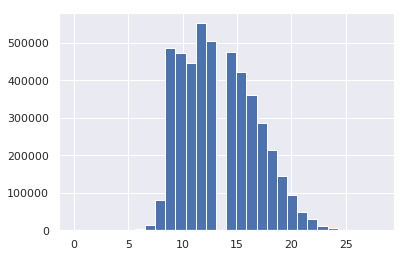

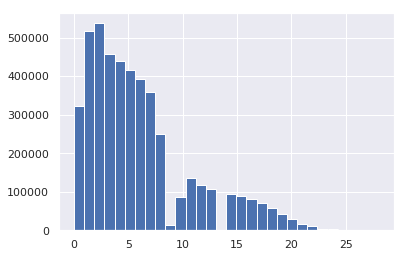

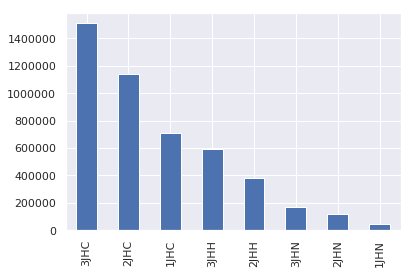

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
train.atom_index_0.hist(bins=30)

fig=plt.figure()
train.atom_index_1.hist(bins=30)

#fig=plt.figure()
#train.type.hist(bins=30)

fig=plt.figure()
train["type"].value_counts().plot(kind="bar")


(-30, 100)

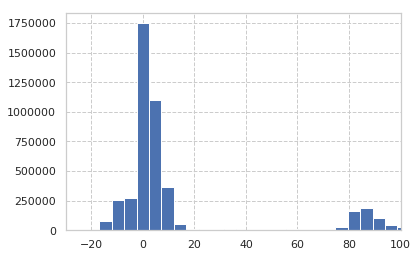

In [3]:
fig=plt.figure()
sns.set()
sns.set_style("whitegrid", {'grid.linestyle': '--'})
train['scalar_coupling_constant'].hist(bins=50)
plt.xlim(-30,100)

In [ ]:
fig,ax=plt.subplots(figsize=(18,6))
plt.subplot(1,2,1)
plt.hist(train["scalar_coupling_constant"],bins=30)
plt.title("scalar_coupling")

plt.subplot(1,2,2)
#sns.violinplot(x='type',y='scalar_coupling_constant',data=train)
#plt.title("violin plot of scalar_coupling by type")

In [ ]:
%debug

In [41]:
train["scalar_coupling_constant"].describe()

count    4.658147e+06
mean     1.592165e+01
std      3.494198e+01
min     -3.621860e+01
25%     -2.549780e-01
50%      2.281130e+00
75%      7.390655e+00
max      2.048800e+02
Name: scalar_coupling_constant, dtype: float64

In [ ]:
%debug

> /home/nagae/anaconda3/envs/gpu-env/lib/python3.6/_weakrefset.py(75)__contains__()
     73         except TypeError:
     74             return False
---> 75         return wr in self.data
     76 
     77     def __reduce__(self):

